In [2]:
!pip install torch datasets evaluate transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [4]:
checkpoint = "mrm8488/t5-base-finetuned-summarize-news"

In [5]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [6]:
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [7]:
model.config.max_length

20

In [8]:
text = """
           Summarize: mumbai based venture capital fund unicorn india ventures invested
           undisclosed sums three kerala based startups said statement startups humanoid
           developer genrobotic innovations smart kitchen appliances maker sectorqube body
           scanning firm perfectfit fashion vc fund made investments across 10 startups
           since inception 2015.

           """

In [9]:
inputs = tokenizer(text, max_length=1024, truncation=True, return_tensors="pt")
inputs

{'input_ids': tensor([[12198,  1635,  1737,    10, 15480,  9441,     3,   390,  6086,  1784,
          3069, 30707, 18222,  6086,     7, 11496,    64,   159, 16221,    26,
          4505,     7,   386,     3,  2304,   138,     9,     3,   390, 17675,
           243,  2493, 17675,   936,    32,    23,    26,  7523,     3,   729,
         23801,  1225, 15858,  2592,  1228,  9403, 13762,  2393,  2436,   346,
           643, 18269,  1669,   626,  5616,  2934,     3,   208,    75,  3069,
           263,  7686,   640,   335, 17675,   437,    16,  7239,  5337,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [10]:
summary_ids = model.generate(inputs['input_ids']  )
summary_ids

tensor([[    0, 32099,    10, 15810,     3,   390,  6086,  1784,  3069, 30707,
         18222,  6086,  1784,  3069,   263,  7686,   640,   335, 17675,   437,
            16]])

In [11]:
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

: Mumbai based venture capital fund unicorn india venture capital fund made investments across 10 startups since in


In [12]:
from datasets import load_dataset
raw_datasets = load_dataset("abisee/cnn_dailymail", "3.0.0")
raw_datasets

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [13]:
raw_datasets['train']['article'][0]

'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details o

In [14]:
lenn = []
for x in raw_datasets['train']['article'] :
  lenn.append(len(x.split()))

In [15]:
len_val = []
for x in raw_datasets['validation']['article'] :
  len_val.append(len(x.split()))

In [16]:
len_test = []
for x in raw_datasets['test']['article'] :
  len_test.append(len(x.split()))

In [17]:
cnt = 0
for i in lenn:
  if i <= 300:
    cnt+=1

cnt

25504

In [18]:
cnt = 0
for i in len_val:
  if i <= 300:
    cnt+=1

cnt

1481

In [19]:
cnt = 0
for i in len_test:
  if i <= 300:
    cnt+=1

cnt

1177

In [20]:
import matplotlib.pyplot as plt

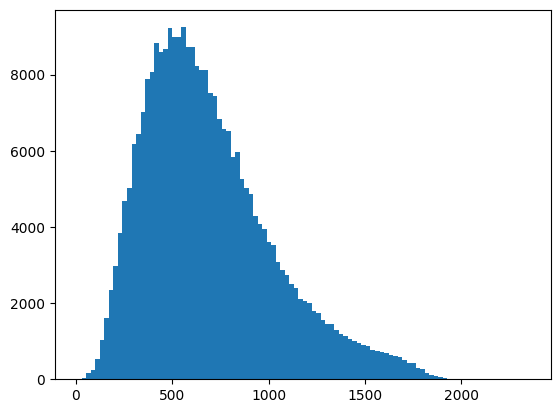

In [21]:
plt.hist(lenn , bins = 100);

In [22]:
prompt = "You are the smartest model ever. Please summarize the following text in a concise manner:\n\n"

In [23]:
filtered_dataset = raw_datasets.map(lambda example: {'article': prompt + example['article']})
filtered_dataset

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [24]:
filtered_dataset['train']['article'][0]

'You are the smartest model ever. Please summarize the following text in a concise manner:\n\nLONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Pa

In [25]:
filtered_dataset = raw_datasets.filter(lambda example: len(example['article'].split()) <= 300)
filtered_dataset

Filter:   0%|          | 0/287113 [00:00<?, ? examples/s]

Filter:   0%|          | 0/13368 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 25504
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 1481
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 1177
    })
})

In [26]:
from datasets import concatenate_datasets , DatasetDict

train_dataset = filtered_dataset["train"]
validation_dataset = filtered_dataset["validation"]
test_dataset = filtered_dataset["test"]

validation_test_dataset = concatenate_datasets([validation_dataset, test_dataset])

In [27]:
raw_datasets = DatasetDict({
    "train": train_dataset,
    "validation": validation_test_dataset
})


raw_datasets

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 25504
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 2658
    })
})

In [28]:
def get_feature(batch):

  inputs = tokenizer(batch['article'], padding="max_length", truncation=True, max_length=512)

  labels = tokenizer(batch['highlights'], padding="max_length", truncation=True, max_length=150)

  inputs['labels'] = labels['input_ids']

  return inputs

In [29]:
tokenized_datasets = raw_datasets.map(get_feature, batched = True)
tokenized_datasets

Map:   0%|          | 0/25504 [00:00<?, ? examples/s]

Map:   0%|          | 0/2658 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 25504
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2658
    })
})

In [30]:
tokenized_datasets = tokenized_datasets.remove_columns(['article', 'highlights', 'id'])
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 25504
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2658
    })
})

In [31]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [32]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(tokenized_datasets['train'] , batch_size = 4 , collate_fn = data_collator , shuffle = True)
val_dataloader = DataLoader(tokenized_datasets['validation'] , batch_size = 4 , collate_fn = data_collator)

In [33]:
for batch in train_dataloader:
    
    print("First batch in train_dataloader:")
    print(batch)  
    
    break

First batch in train_dataloader:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0],
        [ 2386,    41,   254,  ...,     0,     0,     0],
        [  938,     3,     5,  ...,     0,     0,     0],
        [   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[    3, 16911,  4917,   879,  4977,    28,   662, 12052,    13,     3,
          5846,    15,    16,     8,  4509,  1952,     3,     5,  5076,   497,
          4173, 30486,     6,  6154,     6,  1736,     3,     9,   898,    18,
          1201,    18,  1490,  4940,   190,  1012, 16998,  4134,  1120,   350,
         13119,    52,     3,     5, 30486,    65,     3,    60, 15532,    45,
           112,   613,    44,     8, 19722,  4917,   879,    31,     7,   828,
             3,     5, 10154,  2146, 12433,  2106,   537,     6,   520,    13,


In [34]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.001)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [35]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=67ecbb1381fe8a1882d3883416f7eb18a01351cf019d39bec1987ca0a44a37e8
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [56]:
!pip install sentencepiece --q

In [57]:
!pip install huggingface_hub --q

In [ ]:
from huggingface_hub import login

login()

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [40]:
import evaluate

rouge_metric = evaluate.load("rouge")

In [41]:
def compute_rouge(predictions, references):

  results = rouge_metric.compute(predictions=predictions, references=references)
  return results

In [42]:
num_epochs = 2
num_training_steps = num_epochs * len(train_dataloader)
num_training_steps

12752

In [43]:
num_validation_steps = num_epochs * len(val_dataloader)
num_validation_steps

1330

In [44]:
from transformers import get_scheduler

lr_scheduler = get_scheduler( "linear", optimizer = optimizer , num_warmup_steps = 0 , num_training_steps = num_training_steps)

In [45]:
from tqdm.auto import tqdm

progress_bar_for_training = tqdm(range(num_training_steps))
progress_bar_for_validation = tqdm(range(num_validation_steps))

  0%|          | 0/12752 [00:00<?, ?it/s]

  0%|          | 0/1330 [00:00<?, ?it/s]

In [46]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

if torch.cuda.is_available():
  print("Model set to GPU")

Model set to GPU


In [47]:
def train_epoch():

  total_train_loss = 0

  for batch in train_dataloader:

    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)
    loss = outputs.loss
    loss.backward()

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar_for_training.update(1)

    total_train_loss += loss.item()

  return total_train_loss

In [48]:
def get_val_loss():

  total_val_loss = 0
  all_generated_summaries = []
  all_references = []

  with torch.no_grad():

    for batch in val_dataloader:

      batch = {k: v.to(device) for k, v in batch.items()}

      generated_ids = model.generate( batch['input_ids'], attention_mask = batch['attention_mask'] , early_stopping=True)
      generated_summaries = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
      reference_summaries = tokenizer.batch_decode(batch['labels'], skip_special_tokens=True)


      all_generated_summaries.extend(generated_summaries)
      all_references.extend(reference_summaries)

      outputs = model(**batch)
      loss = outputs.loss
      total_val_loss += loss.item()

      progress_bar_for_validation.update(1)

  rouge_results = compute_rouge(all_generated_summaries, all_references)

  return total_val_loss , rouge_results

In [50]:
for epoch in range(num_epochs):

  model.train(True)
  total_train_loss = train_epoch()

  model.eval()
  total_val_loss , rouge_results = get_val_loss()


  avg_train_loss = total_train_loss / len(train_dataloader)
  print(f"Epoch {epoch+1} - Training loss: {avg_train_loss:.4f}")

  avg_val_loss = total_val_loss / len(val_dataloader)
  print(f"Epoch {epoch+1} - Validation loss: {avg_val_loss:.4f}")

  print("ROUGE Scores: " , rouge_results)

  print('-'*150)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:676: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Epoch 1 - Training loss: 0.6159
Epoch 1 - Validation loss: 0.5574
ROUGE Scores:  {'rouge1': 0.29927710148142744, 'rouge2': 0.15573206693296904, 'rougeL': 0.24942864018996758, 'rougeLsum': 0.24969390412576836}
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 2 - Training loss: 0.5036
Epoch 2 - Validation loss: 0.5508
ROUGE Scores:  {'rouge1': 0.29952331925567954, 'rouge2': 0.15580735301627271, 'rougeL': 0.24962684096005475, 'rougeLsum': 0.24989983136965138}
------------------------------------------------------------------------------------------------------------------------------------------------------


In [51]:
text = """
           Ella found the old letter tucked in a dusty corner of the attic.
           Its edges were worn, the ink faded, but the words were still legible:
           "Meet me where the stars touch the sea." Her heart raced. It was a message from Alex,
           her first love, sent the night he left. She hadn't seen him in years.
           Without thinking, she grabbed her coat and ran to the beach.
           As the moonlight reflected off the water, she saw him standing there, waiting.
           A smile spread across her face—some promises were never forgotten,
           no matter how much time passed.
           """

In [52]:
inputs = tokenizer((prompt+text), max_length=512, truncation=True, return_tensors="pt")
inputs

{'input_ids': tensor([[  148,    33,     8,  2592,   222,   825,   664,     5,   863, 21603,
             8,   826,  1499,    16,     3,     9, 22874,  3107,    10, 15334,
             9,   435,     8,   625,  2068,     3,    17, 15318,    16,     3,
             9,  5784,    63,  2752,    13,     8,    44,  1225,     5,    94,
             7,  9804,   130,  8842,     6,     8,    16,   157, 14201,    26,
             6,    68,     8,  1234,   130,   341,  4553,  2317,    10,    96,
           329,    15,    15,    17,   140,   213,     8,  4811,  1586,     8,
          2805,   535,  1347,   842,  1964,    26,     5,    94,    47,     3,
             9,  1569,    45,  5104,     6,   160,   166,   333,     6,  1622,
             8,   706,     3,    88,   646,     5,   451, 12381,    31,    17,
           894,   376,    16,   203,     5,  6404,  1631,     6,   255, 19303,
            26,   160,  6001,    11,  4037,    12,     8,  2608,     5,   282,
             8,  8114,  2242,     3, 1

In [53]:
summary_ids = model.generate(inputs['input_ids'].to(device))
                            
summary_ids

tensor([[    0, 15334,     9,   435,    46,   625,  2068,    16,     8,    44,
          1225,     6,    11,   608,    34,    28,     3,     9,  3993,     3,
             5]], device='cuda:0')

In [54]:
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

Ella found an old letter in the attic, and read it with a smile .


In [55]:
model.config.max_length

20

In [60]:
model.save_pretrained("./my_finetuned_model")
tokenizer.save_pretrained("./my_finetuned_model")
model.config.save_pretrained("./my_finetuned_model")

In [62]:
model.push_to_hub("Salwaaaa/t5-base-finetuned-summarize-dailymail")
model.config.push_to_hub("Salwaaaa/t5-base-finetuned-summarize-dailymail")
tokenizer.push_to_hub("Salwaaaa/t5-base-finetuned-summarize-dailymail")

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Salwaaaa/t5-base-finetuned-summarize-dailymail/commit/084f9e22348fa816d52793d6499c6a761ac7f43c', commit_message='Upload tokenizer', commit_description='', oid='084f9e22348fa816d52793d6499c6a761ac7f43c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Salwaaaa/t5-base-finetuned-summarize-dailymail', endpoint='https://huggingface.co', repo_type='model', repo_id='Salwaaaa/t5-base-finetuned-summarize-dailymail'), pr_revision=None, pr_num=None)